In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
import seaborn as sns

%matplotlib inline

In [2]:
label_encoder = LabelEncoder()
label_binarizer = LabelBinarizer()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


## GETTING THE DATA

In [3]:
car_data = pd.read_csv("car_prices.csv")

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

## Sampling a test set and no data snooping


In [5]:
copy_data= car_data.copy()

In [6]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

## EXPLORING THE DATA

In [7]:
car_data.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.722000e+03,3722.000000,3.663000e+03,3.661000e+03,788.000000,826.000000,755.000000
mean,4.514644e+06,2008.145889,1.949841e+05,1.108062e+04,5.285533,5.157385,208.831788
std,4.297012e+06,4.205670,1.395755e+05,1.091127e+05,0.800853,1.202795,70.940925
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02,2.000000,4.000000,83.000000
25%,2.310000e+06,2005.000000,1.173945e+05,2.000000e+03,5.000000,4.000000,158.000000
50%,3.360000e+06,2008.000000,1.762900e+05,2.500000e+03,5.000000,6.000000,203.000000
75%,5.036250e+06,2011.000000,2.453815e+05,3.500000e+03,5.000000,6.000000,268.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


In [8]:
car_data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


## Histogram of continous data

### Removing outliers

In [9]:
q = car_data['Mileage'].quantile(0.99)
copy_data = copy_data[(copy_data['Mileage']) < q]

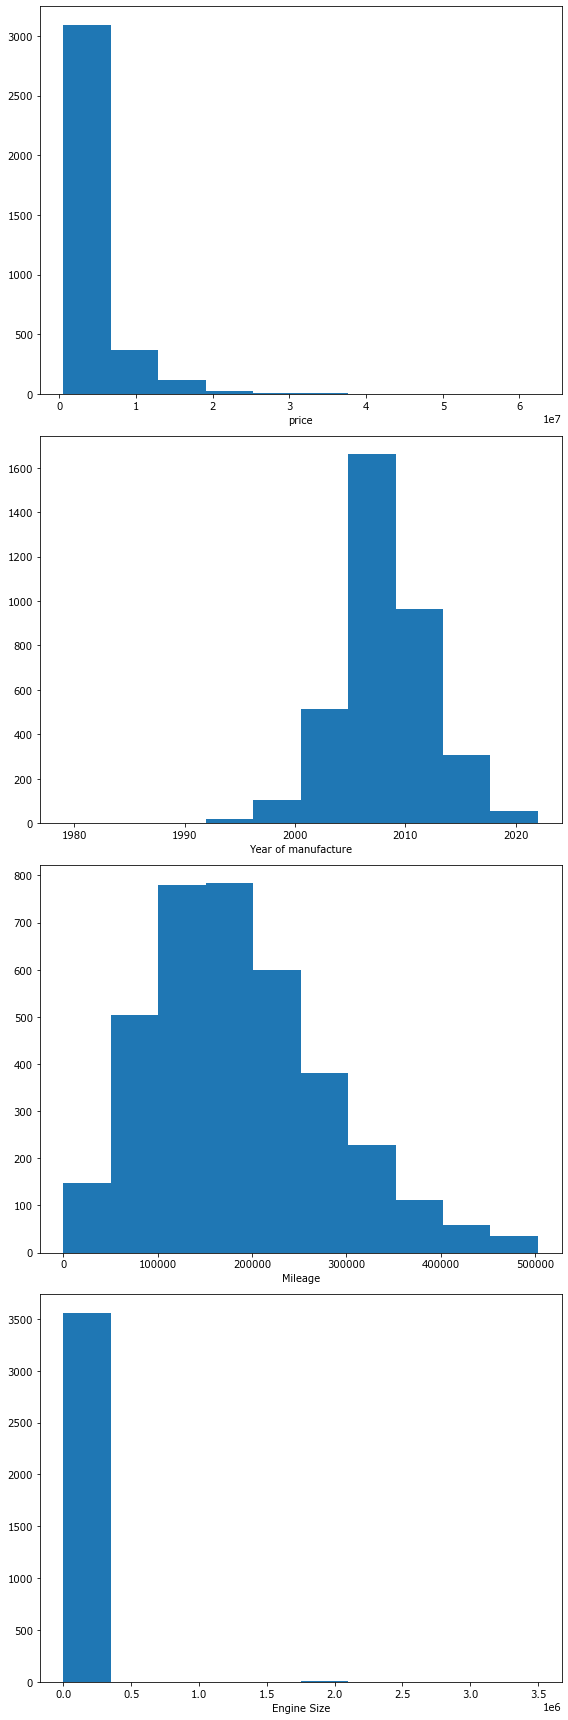

In [10]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(copy_data[column])
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


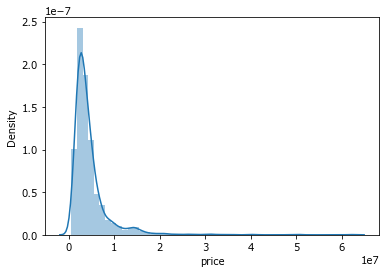

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


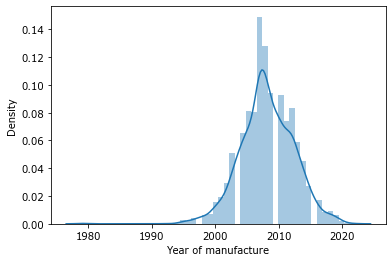

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


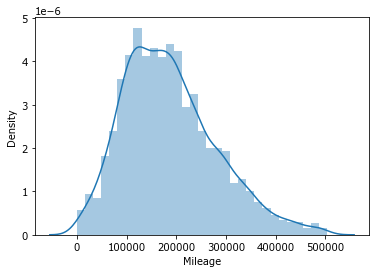

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


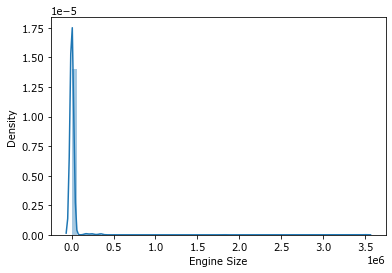

In [11]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(copy_data[column])
    plt.show()  


# Display the plot


### LOG TRANSFORMATION HISTOGRAM


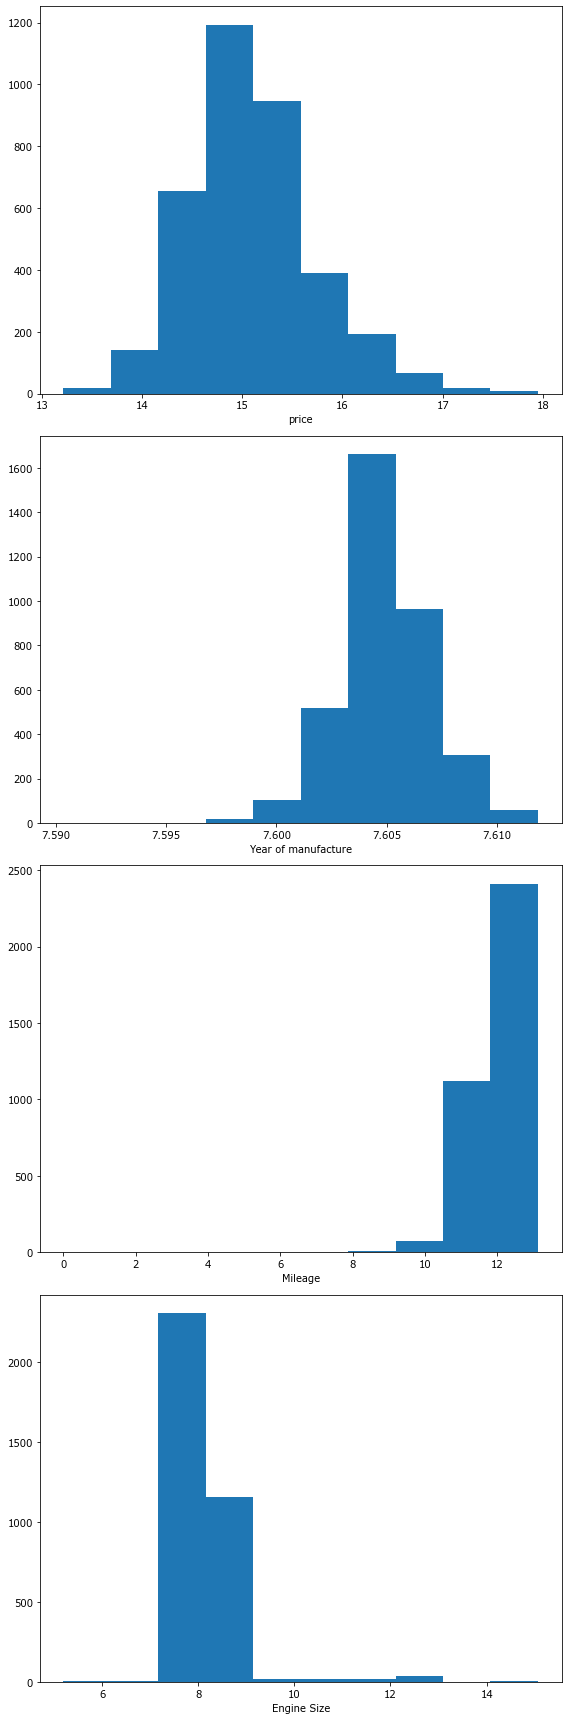

In [12]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(np.log(copy_data[column]))
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

###### car-id: this is the id of the car, which i feel wont describebe anything about the car so needs to be removed \n
###### price- That is our target. it does not have any null value and it is an integer
###### fuel_type: It has one missing vlue, which would be removed
###### gear_type: It has one missing vlue, and anobject
###### color- it has 4 missing values, put in the mode values in each one
###### mileage- it has 45 missing values, and it is a flot, so we can fill in with median
###### Engine size- als have 45+ missing values. it can be filled with median
###### car: has a lot of missing value and it is an object
###### trim, drivetrain,seats,number_of_cylinder,horse power, registered city all have a lot of missing values
###### i would remove from car to registered city


###### Log of price transformation
######  Log all numerical data except from mileage

###### Stochastic noise is often not unavoidable. All you have to do is build robost models, and you can use sross validation technique to know if your data is suspectible to noise.   Robust models like decision tree can reduce outliers

###### removing outliers

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


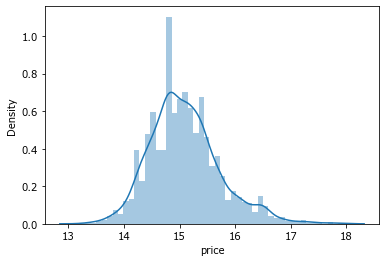

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


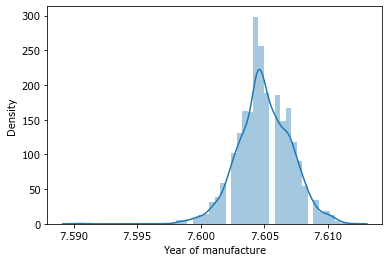

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


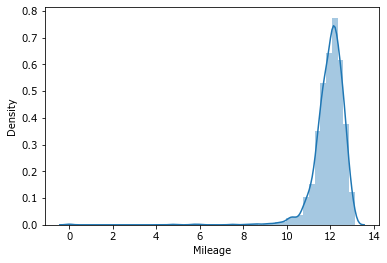

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


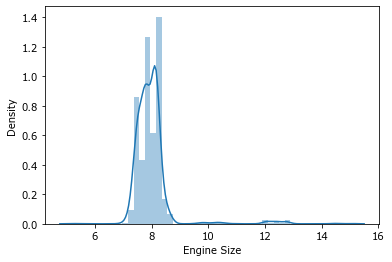

In [13]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(np.log(copy_data[column]))
    plt.show()  


In [14]:
## CORELLATION
numerical_columns = copy_data.select_dtypes(include = ['int64', 'float64'])
correlation_columns = numerical_columns.corr()
print(correlation_columns)

                        price  Year of manufacture   Mileage  Engine Size  \
price                1.000000             0.546425 -0.300689     0.002445   
Year of manufacture  0.546425             1.000000 -0.420226     0.001899   
Mileage             -0.300689            -0.420226  1.000000    -0.008788   
Engine Size          0.002445             0.001899 -0.008788     1.000000   
Seats                0.087512            -0.057537  0.007521     0.338944   
Number of Cylinders  0.206096            -0.102895 -0.003831     0.837542   
Horse Power          0.404058             0.201494 -0.112645     0.836768   

                        Seats  Number of Cylinders  Horse Power  
price                0.087512             0.206096     0.404058  
Year of manufacture -0.057537            -0.102895     0.201494  
Mileage              0.007521            -0.003831    -0.112645  
Engine Size          0.338944             0.837542     0.836768  
Seats                1.000000             0.376491   

In [15]:
## CORELLATION WITH LOG
numerical_columns = copy_data.select_dtypes(include = ['int64', 'float64'])
correlation_columns = np.log(numerical_columns).corr()
print(correlation_columns)

                        price  Year of manufacture   Mileage  Engine Size  \
price                1.000000             0.685183 -0.286341     0.111652   
Year of manufacture  0.685183             1.000000 -0.361988    -0.024887   
Mileage             -0.286341            -0.361988  1.000000    -0.007352   
Engine Size          0.111652            -0.024887 -0.007352     1.000000   
Seats                0.065007            -0.059591 -0.011949     0.318630   
Number of Cylinders  0.223339            -0.107773  0.011752     0.823393   
Horse Power          0.430841             0.213734 -0.092818     0.853218   

                        Seats  Number of Cylinders  Horse Power  
price                0.065007             0.223339     0.430841  
Year of manufacture -0.059591            -0.107773     0.213734  
Mileage             -0.011949             0.011752    -0.092818  
Engine Size          0.318630             0.823393     0.853218  
Seats                1.000000             0.362751   

In [16]:
## remove engine size
## remove seats
## Add power/cylinder
## Log all numerical values

### PREPARING THE DATA

In [17]:
object_columns = car_data.select_dtypes(exclude=['int64', 'float64'])
for column in object_columns:
    print(f"{car_data[column].nunique()}  column {column}")


3120  column car_id
4  column fuel type
3  column gear type
50  column Make
325  column Model
18  column Colour
3  column Condition
3  column Selling Condition
3  column Bought Condition
15  column car
388  column Trim
6  column Drivetrain
71  column Registered city


In [18]:
needed = ['fuel type', 'gear type', 'Condition' , 'Bought Condition', 'Selling Condition']
for need in needed:
    print( car_data[need].value_counts())

Petrol      3670
Hybrid        36
Diesel        14
Electric       1
Name: fuel type, dtype: int64
Automatic    3486
Manual        202
CVT            32
Name: gear type, dtype: int64
Nigerian Used    2813
Foreign Used      907
Brand New           2
Name: Condition, dtype: int64
Imported      1939
Registered    1658
Brand new      125
Name: Bought Condition, dtype: int64
Registered    2813
Imported       907
Brand new        2
Name: Selling Condition, dtype: int64


In [19]:



categories_to_remove = {
    "fuel type": ["Electric"],
    "Condition": ["Brand New"],
    "Selling Condition": ["Brand New"],
    # Add more columns and categories as needed
}

for column_name, categories in categories_to_remove.items():
    mask = ~car_data[column_name].isin(categories)
    car_data = car_data[mask]


In [20]:
needed = ['fuel type', 'gear type', 'Condition' , 'Bought Condition', 'Selling Condition']
for need in needed:
    print( car_data[need].value_counts())

Petrol    3668
Hybrid      36
Diesel      14
Name: fuel type, dtype: int64
Automatic    3484
Manual        201
CVT            32
Name: gear type, dtype: int64
Nigerian Used    2812
Foreign Used      907
Name: Condition, dtype: int64
Imported      1938
Registered    1656
Brand new      125
Name: Bought Condition, dtype: int64
Registered    2812
Imported       907
Name: Selling Condition, dtype: int64


<AxesSubplot:xlabel='fuel type', ylabel='count'>

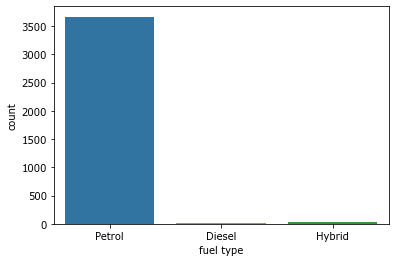

In [21]:
sns.countplot(x= car_data['fuel type'])

<AxesSubplot:xlabel='gear type', ylabel='count'>

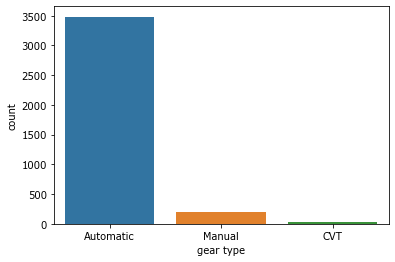

In [22]:
sns.countplot(x= car_data['gear type'])

<AxesSubplot:xlabel='Condition', ylabel='count'>

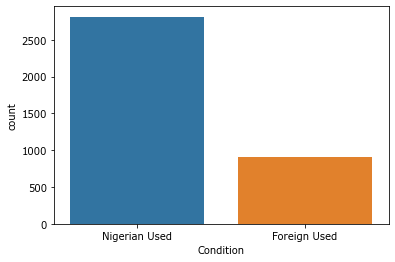

In [23]:
sns.countplot(x= car_data['Condition'])

<AxesSubplot:xlabel='Selling Condition', ylabel='count'>

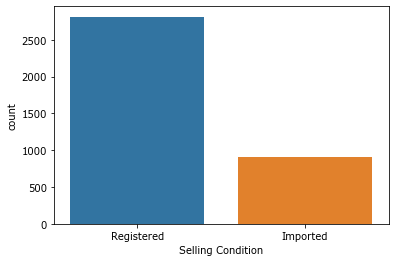

In [24]:
sns.countplot(x= car_data['Selling Condition'])

<AxesSubplot:xlabel='Bought Condition', ylabel='count'>

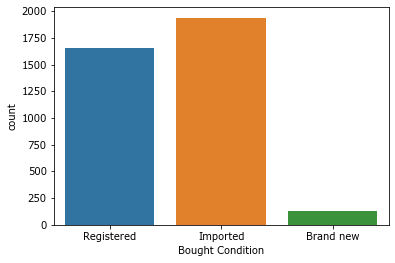

In [25]:
sns.countplot(x= car_data['Bought Condition'])

In [26]:

# def fill_in_object_value(column_list, data):
#     for column_name in column_list:
#         try:
#             mode = data[column_name].mode()[0]
#             data[column_name].fillna(mode, inplace = True)
#         except IndexError:
#            continue
#     return data
# def fill_in_numeric_value(column_list, data):
#     for column_name in column_list:

#         try:
#             mean_value = data[column_name].mean()
#             data[column_name].fillna(mean_value, inplace=True) 
             
#         except IndexError:
#             continue

    
    # return data
# def remove_column(data, column_list=[]):
#     for column in column_list:
#         try:
#             data.drop(column, axis=1, inplace =True)
#         except KeyError:
#             continue
#     return data
        
# def decompose_object(column_name, data):

#     data[column_name] = data[column_name].astype(str)

#     label_binarizer = LabelBinarizer()
#     one_hot_encoded = label_binarizer.fit_transform(data[column_name])

#     encoded_columns = [f'encoded_{class_}' for class_ in label_binarizer.classes_]
#     df_encoded = pd.DataFrame(one_hot_encoded, columns=encoded_columns)

#     df_final = pd.concat([data, df_encoded], axis=1)

#     return df_final

# def aggregate_features(data ):
#     data["power/cylinder"] = data["Horse Power"]/ data["Number of Cylinders"]
#     return data


# def log_feature(column_list, data):
#     for column in column_list:
#         data[column] = np.log(data[column])
#     return data


# def prepare_scale_binarizer (numerical_columns, object_columns, data):
#     scaled_column = standard_scaler.fit_transform(numerical_columns)
#     scaled_numeric_df = pd.DataFrame(scaled_column, columns = numerical_columns.columns)


#     binarized_labels_dfs = []
#     for col in object_columns.columns:
#         binarized_label = label_binarizer.fit_transform(object_columns[col])
#         binarized_labels_df = pd.DataFrame(binarized_label, columns=label_binarizer.classes_)
#         binarized_labels_dfs.append(binarized_labels_df)

#     concatenated_dataframe = pd.concat([scaled_numeric_df] + binarized_labels_dfs, axis=1)
#     return concatenated_dataframe
    


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        column_list = [
            'car_id', 'car', 'Trim', 'Drivetrain', 'Seats', 'Registered city',
            'Engine Size', 'cylinder/pw', 'Model', 'Make', 'Colour'  # Fixed typo here
        ]
        
        for column in column_list:
            try:
                X.drop(column, axis=1, inplace=True)
            except KeyError:
                continue
        return X


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, data_type):
        self.data_type = data_type  
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.data_type == "num":  
            data = X.select_dtypes(include=['int64', 'float64'])
        elif self.data_type == "cat":  
            data = X.select_dtypes(exclude=['int64', 'float64'])  
            
        return data


In [29]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class MultiLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binarized_labels = None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        binarized_columns = [] 
        
        for col_idx in range(X.shape[1]): 
            label_binarizer = LabelBinarizer()  
            binarized_column = label_binarizer.fit_transform(X[:, col_idx])
            binarized_columns.append(binarized_column)
        
        self.binarized_labels = np.hstack(binarized_columns)  
        return self.binarized_labels


In [30]:
car_details = car_data.copy()

In [31]:

num_attributes = car_details.select_dtypes(include= ['int64', 'float64']).columns
num_attributes = num_attributes.drop('price')
cat_attributes =  car_details.select_dtypes(exclude= ['int64', 'float64']).columns

num_pipeline = Pipeline(
    [
        ('selector', DataFrameSelector(data_type = "num")),
        ('Remove_column', RemoveColumn()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ]

)


cat_pipeline = Pipeline(
    [
        ('selector', DataFrameSelector(data_type = "cat")),
        ('remove_column', RemoveColumn()),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('binarizer', MultiLabelBinarizer()),
        
    ]

    
)

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ('cat_pipeline', cat_pipeline),

])

### MODEL SELECTIIOIN

In [32]:
X = car_details.drop(['price'], axis = 1)
y  = car_details['price']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
prepared = full_pipeline.fit_transform(x_train)
y_train = np.log(y_train)

In [34]:
prepared.shape

(2975, 15)

In [35]:
# from sklearn.metrics import mean_squared_error, r2_score 
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import SGDRegressor, LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import StackingRegressor
# from sklearn.ensemble import VotingRegressor
# from sklearn.inspection import permutation_importance



# models = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
#          ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
#           ('grad',GradientBoostingRegressor()),('lnr', LinearRegression()),]
          
# for i,j in models:
#     scores = cross_val_score(j, prepared, y_train, scoring='neg_mean_squared_error', cv=10)
#     rmse = np.sqrt(-scores.mean())
#     print(i,rmse)

In [36]:
import joblib

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(prepared,y_train)
joblib.dump(model, "my_model.pkl")

['my_model.pkl']

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), prepared, y_train, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores.mean())
print(rmse)

0.3959117362162116


In [54]:
model = joblib.load("my_model.pkl")

## Evaluating on test set

In [55]:

test_features = full_pipeline.transform(x_test)

In [56]:
prediction = model.predict(test_features)
real_prediction = np.exp(prediction)


In [73]:
y_test = y_test.values

In [74]:
final_mse = mean_squared_error(y_test, real_prediction)
final_rmse = np.sqrt(final_mse) 
final_rmse

3042373.102270368

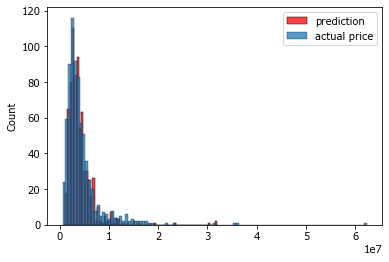

In [75]:
sns.histplot(real_prediction, label='prediction',color='red')
sns.histplot(y_test, label='actual price')
plt.legend()

In [76]:
df_pred = pd.DataFrame((real_prediction), columns=['Prediction'])
df_pred['Target'] = y_test

df_pred['Difference%'] = np.absolute((df_pred['Target'] - df_pred['Prediction'])/df_pred['Target']*100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_pred = df_pred.sort_values(by=['Difference%'])
df_pred

,Prediction,Target,Difference%
424,4204288.494,4200000,0.102
213,4415252.220,4410000,0.119
182,3145522.559,3150000,0.142
624,1778511.121,1775000,0.198
440,2095794.762,2100000,0.200
...,...,...,...
645,2424738.338,840000,188.659
513,6627275.152,1995000,232.194
230,2867988.837,840000,241.427
93,3792779.172,1049992,261.220
